In [21]:
#To check whether a particular message is spam or not
import pandas as pd
messages= pd.read_csv('/home/aastha/Downloads/SMSSpamCollection', sep = '\t', names = ['label','message'])
#/t will help us divide this into two columns so the first ham spam will be dependent variable and the rest will be independent.
messages.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [26]:
#Data Cleaning and Preprocessing
import re
import nltk
nltk.download('stopwords')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to /home/aastha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()# also try with lemmatizer
corpus = []
for i in range(len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    #fetching ith message from message column of messages. Here messages[i] will have two columns/attribute, i.e.,
    #label and message. So messages[message]
    #will get the whole messages column and to get only the ith entry, you need to mention that as well.
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
    
print(len(corpus[0]))
print(len(corpus[1]))

76
21


In [28]:
#creating bag of words
#corpus.append("hi")
from sklearn.feature_extraction.text import CountVectorizer #(use tf-idf model too)
cv = CountVectorizer(max_features = 5000) #instead of takinf so many columns we are reducing it to 5000
X = cv.fit_transform(corpus).toarray()
X[-1]



array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y = pd.get_dummies(messages['label'])
y = y.iloc[:,1].values


messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
#naivebayes works very well wrt nlp.It is a classifictaion technique and works on probability
#Train test split
from sklearn.model_selection import train_test_split
X_train , X_test, y_train,y_test = train_test_split(X,y, test_size = 0.20 , random_state = 0)
X_test.shape
X_test[0]
X[0]

array([0, 0, 0, ..., 0, 0, 0])

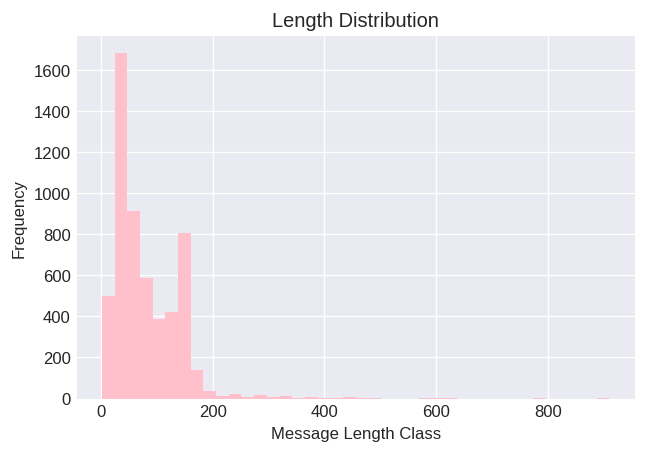

In [37]:
plt.style.use('seaborn-darkgrid')

fig = plt.figure(dpi = 120)
ax = plt.axes()
messages['length'].plot(bins=40, kind='hist',ax=ax,color = 'pink')
ax.set(xlabel = 'Message Length Class',ylabel = 'Frequency',title = 'Length Distribution');

In [10]:
#a decision tree is a non-linear model built by constructing many linear boundaries.
#To create a decision tree and train (fit) it on the data, we use Scikit-Learn.
#from sklearn.tree import DecisionTreeClassifier
#tree = DecisionTreeClassifier(random_state = 0)
#tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [12]:
#y_pred = tree.predict(X_test)

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)
print(confusion_m)

[[955   0]
 [ 20 140]]


In [20]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test , y_pred)
print(acc)

0.9820627802690582
